In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline
sns.set(rc={'figure.figsize':(10,5)})
plt.rcParams['figure.figsize']=10,5
import pandas_profiling as pp
from scipy.stats import kurtosis, skew

In [3]:
data_path = 'fake-listings-dataset.csv'
df = pd.read_csv(data_path,na_values=('NA','na','null','NULL','Null'), encoding='utf-8')

### Labels 

In [4]:
df['label']=df.apply(lambda x: 0 if x['label']==-1 else 1 ,axis=1)
df['feature_categorical_4'] = df['feature_categorical_4'].apply(lambda x : 1 if x =='071ab177220089b7ba03fd5fdb4d71513c67ad39' else 0)

In [42]:
df2 = df.copy()

In [5]:
df.shape

(5651, 20)

In [9]:
df.columns

Index([u'feature_numerical_7', u'feature_numerical_6', u'feature_numerical_5',
       u'feature_numerical_4', u'feature_numerical_3', u'feature_numerical_2',
       u'feature_numerical_1', u'feature_categorical_5',
       u'feature_categorical_4', u'feature_categorical_3',
       u'feature_categorical_2', u'feature_categorical_1',
       u'feature_numerical_8', u'feature_numerical_10', u'feature_numerical_9',
       u'feature_numerical_13', u'feature_numerical_12',
       u'feature_numerical_11', u'label', u'feature_numerical_14'],
      dtype='object')

In [10]:
df.isnull().any()

feature_numerical_7      False
feature_numerical_6      False
feature_numerical_5      False
feature_numerical_4      False
feature_numerical_3      False
feature_numerical_2      False
feature_numerical_1      False
feature_categorical_5    False
feature_categorical_4    False
feature_categorical_3    False
feature_categorical_2    False
feature_categorical_1    False
feature_numerical_8      False
feature_numerical_10      True
feature_numerical_9      False
feature_numerical_13      True
feature_numerical_12      True
feature_numerical_11      True
label                    False
feature_numerical_14      True
dtype: bool

In [7]:
def null_counter(df):
    for i in df.columns:
        print (i+' : '+str((sum(df[i].isnull())/len(df[i]))*100))

def unique_counter(df):
    for i in df.columns:
        print (i+' : '+str(df[i].nunique()))

In [28]:
null_counter(df)

feature_numerical_7 : 0.0
feature_numerical_6 : 0.0
feature_numerical_5 : 0.0
feature_numerical_4 : 0.0
feature_numerical_3 : 0.0
feature_numerical_2 : 0.0
feature_numerical_1 : 0.0
feature_categorical_5 : 0.0
feature_categorical_4 : 0.0
feature_categorical_3 : 0.0
feature_categorical_2 : 0.0
feature_categorical_1 : 0.0
feature_numerical_8 : 0.0
feature_numerical_10 : 3.20297292515
feature_numerical_9 : 0.0
feature_numerical_13 : 13.2719872589
feature_numerical_12 : 0.637055388427
feature_numerical_11 : 11.3077331446
label : 0.0
feature_numerical_14 : 18.4215183153


In [29]:
unique_counter(df)

feature_numerical_7 : 684
feature_numerical_6 : 2156
feature_numerical_5 : 1751
feature_numerical_4 : 4010
feature_numerical_3 : 3866
feature_numerical_2 : 765
feature_numerical_1 : 1397
feature_categorical_5 : 3
feature_categorical_4 : 2
feature_categorical_3 : 1924
feature_categorical_2 : 3178
feature_categorical_1 : 5651
feature_numerical_8 : 153
feature_numerical_10 : 1907
feature_numerical_9 : 354
feature_numerical_13 : 353
feature_numerical_12 : 1523
feature_numerical_11 : 524
label : 2
feature_numerical_14 : 2051


In [525]:
print df.feature_categorical_5.value_counts()
print '\n'
print df.feature_categorical_4.value_counts()

77de68daecd823babbb58edb1c8e14d7106e83bb    3934
356a192b7913b04c54574d18c28d46e6395428ab     906
da4b9237bacccdf19c0760cab7aec4a8359010b0     811
Name: feature_categorical_5, dtype: int64


071ab177220089b7ba03fd5fdb4d71513c67ad39    5078
e4b2609d5f2fc04e780193db49bf54acce45d6a3     573
Name: feature_categorical_4, dtype: int64


In [526]:
pd.crosstab(df.feature_categorical_4, df.label).apply(lambda r: r/r.sum(), axis=1)

label                                            0         1
feature_categorical_4                                       
071ab177220089b7ba03fd5fdb4d71513c67ad39  0.729027  0.270973
e4b2609d5f2fc04e780193db49bf54acce45d6a3  1.000000  0.000000

In [527]:
pd.crosstab(df.feature_categorical_5, df.label).apply(lambda r: r/r.sum(), axis=1)

label                                            0         1
feature_categorical_5                                       
356a192b7913b04c54574d18c28d46e6395428ab  0.993377  0.006623
77de68daecd823babbb58edb1c8e14d7106e83bb  0.655058  0.344942
da4b9237bacccdf19c0760cab7aec4a8359010b0  0.983970  0.016030

In [562]:
df[num_features].describe(include='all')

feature_numerical_1  feature_numerical_2  feature_numerical_3  \
count           5651.000000          5651.000000          5651.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean               0.022877             0.032274             0.420708   
std                0.053478             0.062001             0.254355   
min                0.000000             0.000366             0.000000   
25%                0.004450             0.008535             0.203942   
50%                0.008386             0.015873             0.434265   
75%                0.016928             0.029292             0.633979   
max                1.000000             1.000000             1.000000   

        feature_numerical_4  feature_numerical_5  feature_numerical_6  \
count           5651.000000          5651.000000          5651.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean               0.129870             0.185851             0.036767   
std                0.102616             0.249108             0.050378   
min                0.000000             0.000000             0.000000   
25%                0.052042             0.022470             0.007709   
50%                0.113137             0.066335             0.018465   
75%                0.186918             0.248824             0.043362   
max                1.000000             1.000000             1.000000   

        feature_numerical_7  feature_numerical_8  feature_numerical_9  \
count           5651.000000          5651.000000          5651.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean               0.005176             0.007160             0.099952   
std                0.019096             0.022973             0.217781   
min                0.000000             0.000000             0.000000   
25%                0.000571             0.000000             0.000000   
50%                0.001999             0.000790             0.000000   
75%                0.004337             0.004739             0.092450   
max                1.000000             0.932070             1.000000   

        feature_numerical_10  feature_numerical_11  feature_numerical_12  \
count            5470.000000           5012.000000           5615.000000   
unique                   NaN                   NaN                   NaN   
top                      NaN                   NaN                   NaN   
freq                     NaN                   NaN                   NaN   
mean                0.662293              0.084598              0.602322   
std                 0.160646              0.166676              0.186622   
min                 0.000000              0.000000              0.000000   
25%                 0.594388              0.000000              0.542308   
50%                 0.694828              0.020429              0.664555   
75%                 0.773438              0.083333              0.727330   
max                 1.000000              1.000000              1.000000   

        feature_numerical_13  feature_numerical_14  \
count            4901.000000           4610.000000   
unique                   NaN                   NaN   
top                      NaN                   NaN   
freq                     NaN                   NaN   
mean                0.199401              0.290554   
std                 0.278361              0.234777   
min                 0.000000              0.000000   
25%                 0.000000    

In [115]:
for x in num_only_features:
    print(x, 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df[x]) ))
    print(x, 'skewness of normal distribution (should be 0): {}'.format( skew(df[x]) ))

feature_numerical_1 excess kurtosis of normal distribution (should be 0): 77.32727403882014
feature_numerical_1 skewness of normal distribution (should be 0): 7.282401274062824
feature_numerical_2 excess kurtosis of normal distribution (should be 0): 71.89299236753382
feature_numerical_2 skewness of normal distribution (should be 0): 7.160286298716977
feature_numerical_3 excess kurtosis of normal distribution (should be 0): -1.1707167486153063
feature_numerical_3 skewness of normal distribution (should be 0): -0.08077182929294222
feature_numerical_4 excess kurtosis of normal distribution (should be 0): 4.893559865190466
feature_numerical_4 skewness of normal distribution (should be 0): 1.4360424968429653
feature_numerical_5 excess kurtosis of normal distribution (should be 0): 3.0144406399763097
feature_numerical_5 skewness of normal distribution (should be 0): 1.8877745522173903
feature_numerical_6 excess kurtosis of normal distribution (should be 0): 34.29503059950738
feature_numeric

label
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

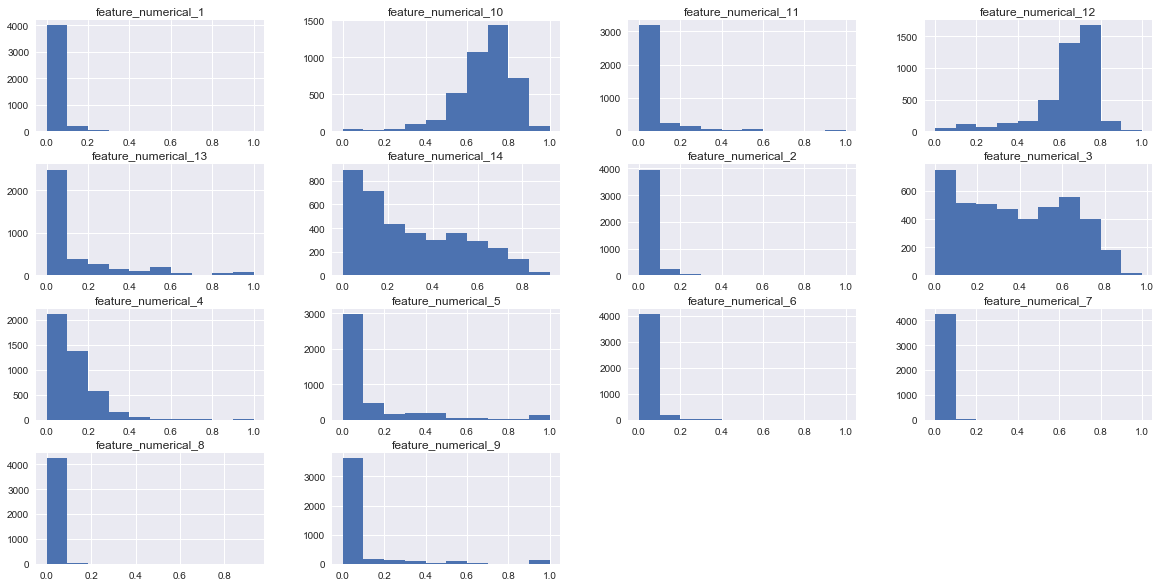

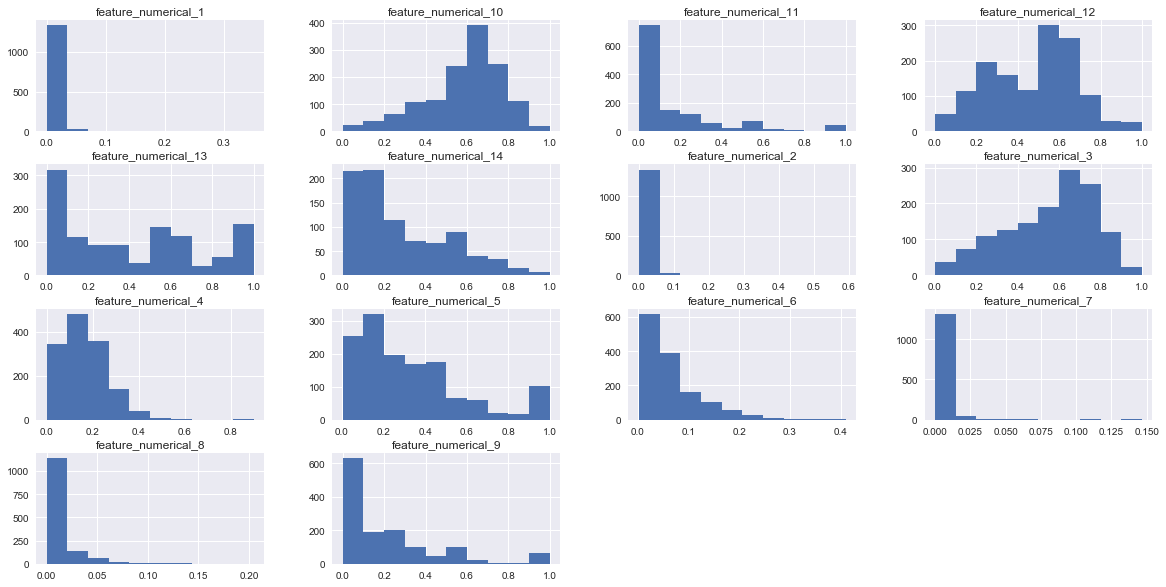

In [10]:
df[num_only_features+labels].groupby('label').hist(figsize=(20,10))

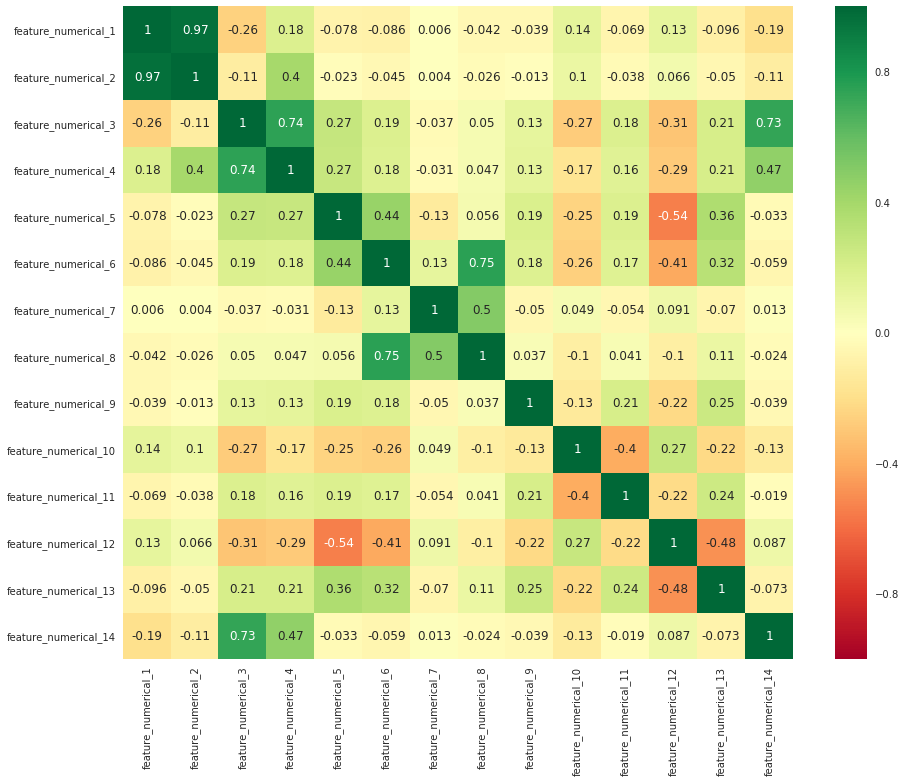

In [65]:
a4_dims = (15, 12)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.heatmap(df[num_only_features].corr(),annot=True,cmap="RdYlGn", ax = ax)

In [51]:
skewed_var = ['feature_numerical_1','feature_numerical_11','feature_numerical_13','feature_numerical_2','feature_numerical_5',
             'feature_numerical_6','feature_numerical_7','feature_numerical_8','feature_numerical_9']
high_corr = ['feature_numerical_1']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d06e7b8>,
      dtype=object)

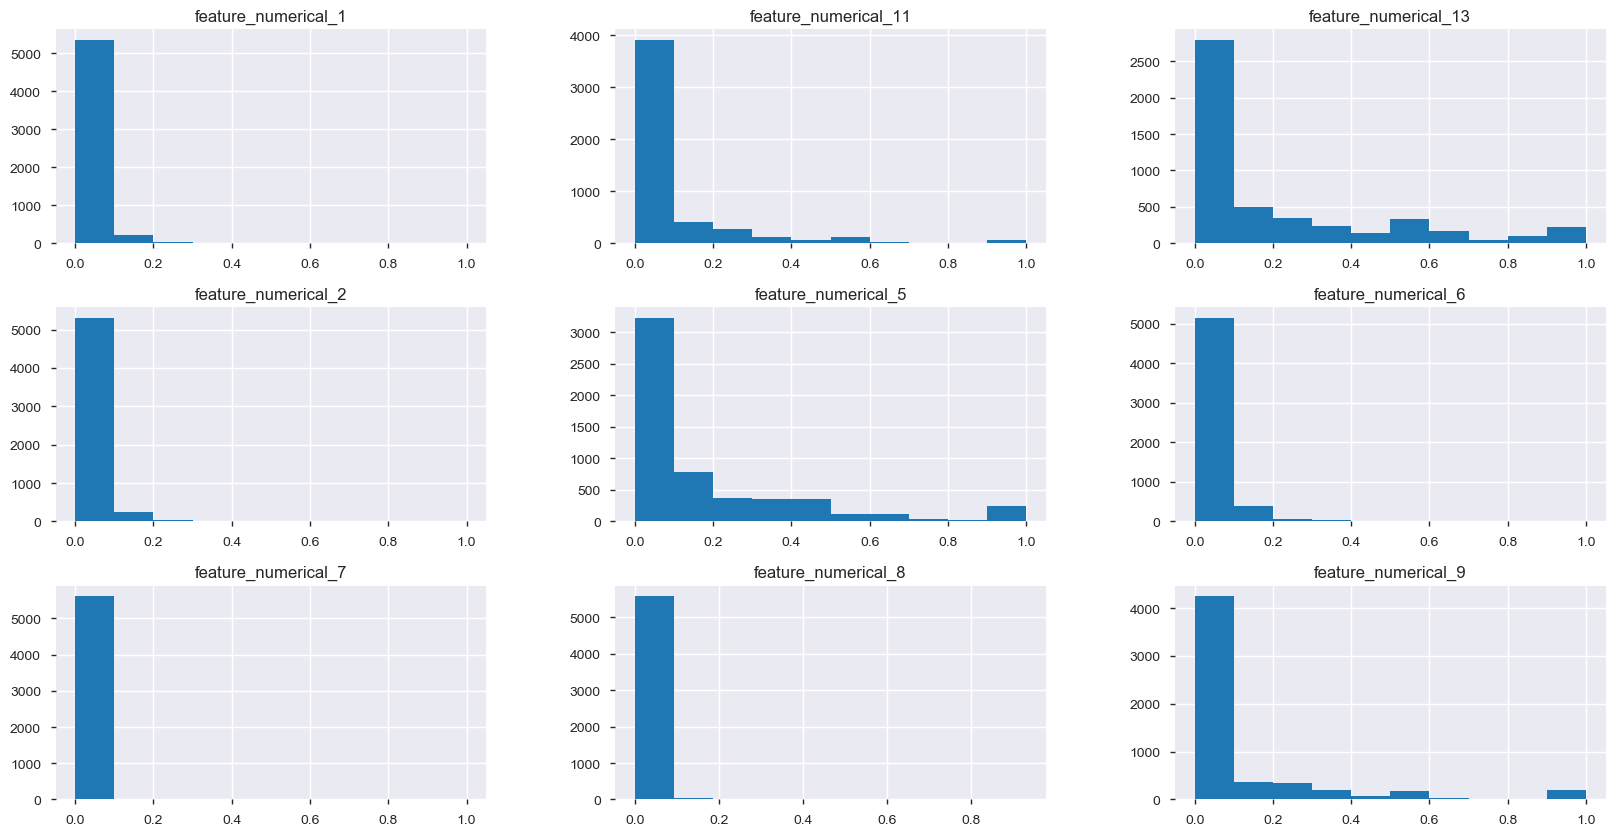

In [55]:
df2[skewed_var].hist(figsize = (20,10))

### Log Transform

In [101]:
class logTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols, impute=True, impute_strategy='mean'):
        self.cols = cols
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)
        
    def fit(self, X, y = None):
        if hasattr(self, 'imputer'):
            self.imputer.fit(X[self.cols])
        return self

    def transform(self, X, y=None):
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X[self.cols]), columns=self.cols)
        for i in X.columns:
            X[i] = np.log(X[i]+100)
        return X
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22e2ea58>,
      dtype=object)

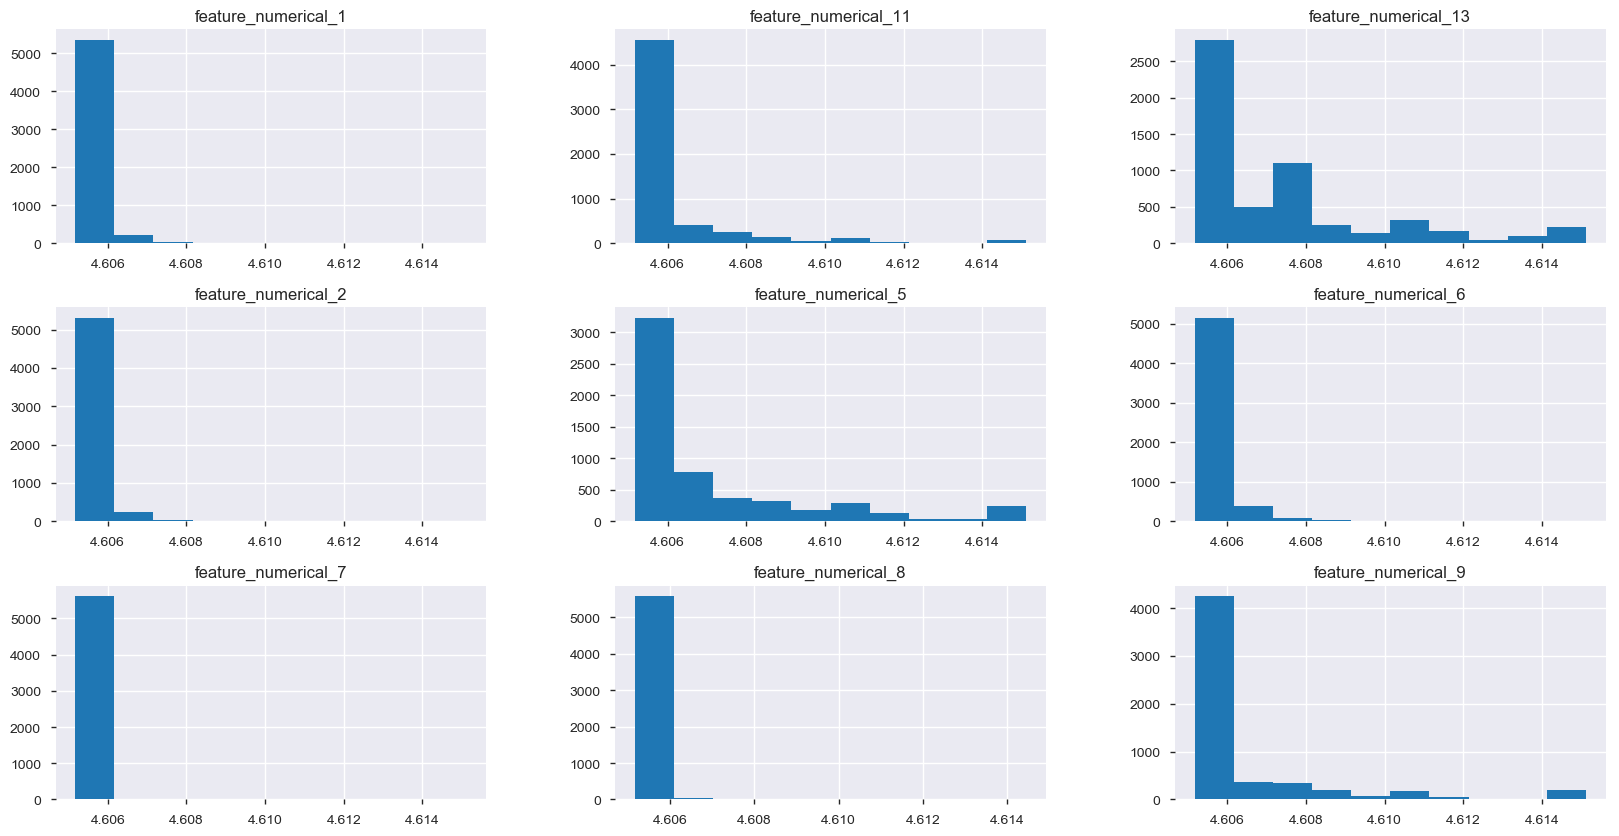

In [102]:
lg = logTransform(skewed_var)
y = lg.fit_transform(df2)
y.hist(figsize = (20,10))

### Square Transform 

In [103]:
class sqTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols, impute=True, impute_strategy='mean'):
        self.cols = cols
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)
        
    def fit(self, X, y = None):
        if hasattr(self, 'imputer'):
            self.imputer.fit(X[self.cols])
        return self

    def transform(self, X, y=None):
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X[self.cols]), columns=self.cols)
        for i in X.columns:
            X[i] = np.square(X[i])
        return X
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23936208>,
      dtype=object)

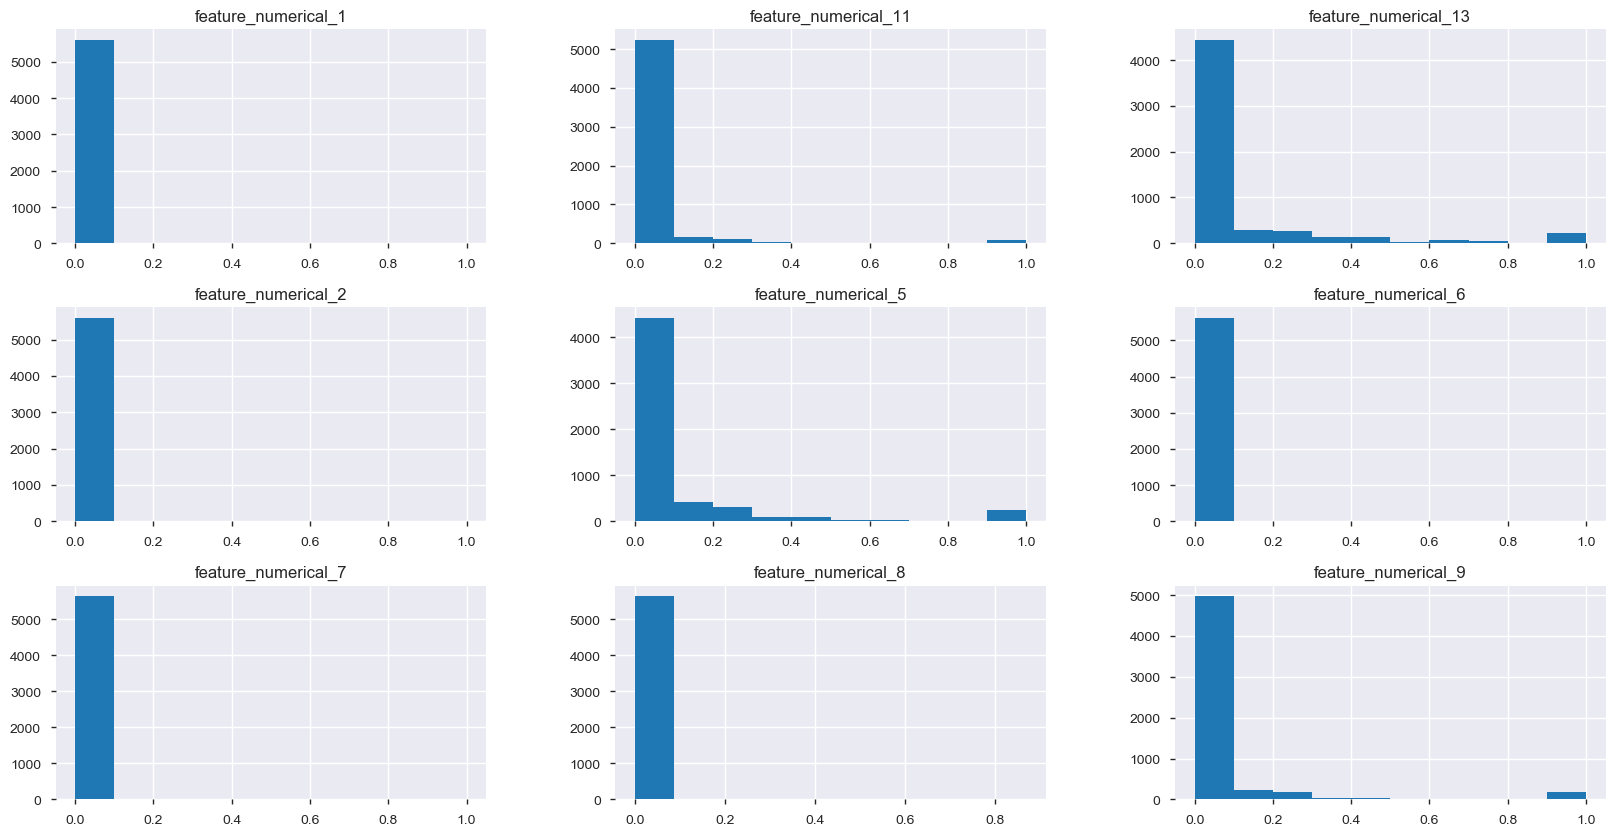

In [104]:
lg = sqTransform(skewed_var)
y = lg.fit_transform(df2)
y.hist(figsize = (20,10))

### Exp Transformation

In [120]:
class cbrtTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols, impute=True, impute_strategy='mean'):
        self.cols = cols
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)
        
    def fit(self, X, y = None):
        if hasattr(self, 'imputer'):
            self.imputer.fit(X[self.cols])
        return self

    def transform(self, X, y=None):
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X[self.cols]), columns=self.cols)
        for i in X.columns:
            X[i] = np.cbrt(X[i])
        return X
        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26d77208>,
      dtype=object)

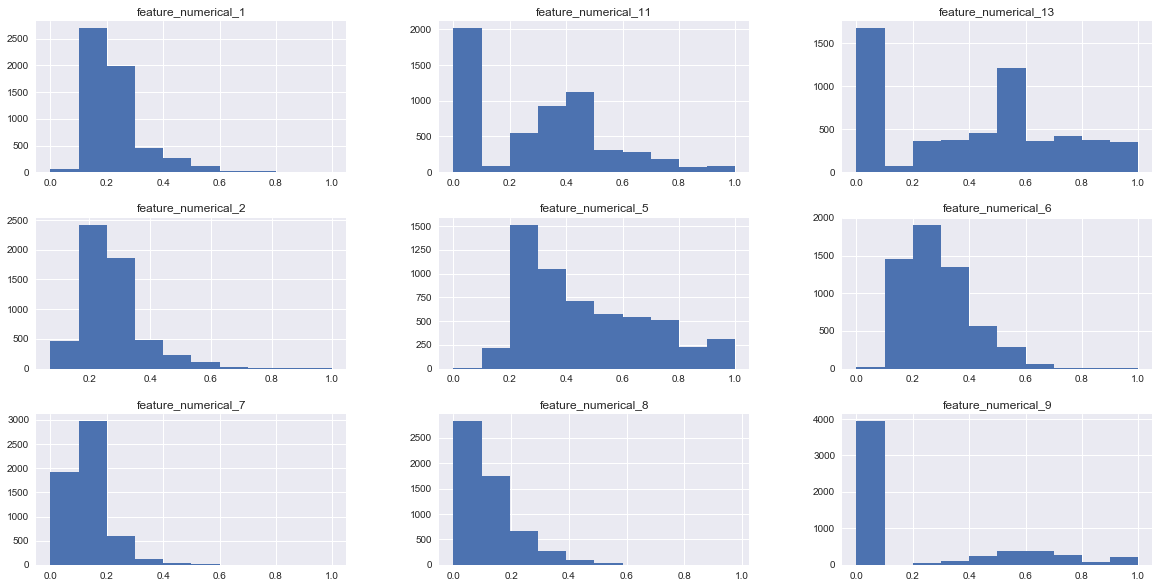

In [121]:
lg = cbrtTransform(skewed_var)
y = lg.fit_transform(df2)
y.hist(figsize = (20,10))

In [116]:
for x in y.columns:
    print(x, 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y[x]) ))
    print(x, 'skewness of normal distribution (should be 0): {}'.format( skew(y[x]) ))

feature_numerical_1 excess kurtosis of normal distribution (should be 0): 13.176375902949086
feature_numerical_1 skewness of normal distribution (should be 0): 3.0458362077984154
feature_numerical_11 excess kurtosis of normal distribution (should be 0): 1.8937341696797798
feature_numerical_11 skewness of normal distribution (should be 0): 1.2912066871933252
feature_numerical_13 excess kurtosis of normal distribution (should be 0): -0.7176101800708317
feature_numerical_13 skewness of normal distribution (should be 0): 0.5114370689103886
feature_numerical_2 excess kurtosis of normal distribution (should be 0): 12.858630701344369
feature_numerical_2 skewness of normal distribution (should be 0): 2.8454094612098575
feature_numerical_5 excess kurtosis of normal distribution (should be 0): 0.11590494008972696
feature_numerical_5 skewness of normal distribution (should be 0): 1.0287273827521766
feature_numerical_6 excess kurtosis of normal distribution (should be 0): 2.7296950308382444
featur

In [45]:
transformer = ReduceVIF()
y = df['label']
# Only use 10 columns for speed in this example
X = transformer.fit_transform(df2[df2[num_only_features].columns[-10:]], y)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping feature_numerical_10 with vif=12.829466025111364
Dropping feature_numerical_6 with vif=6.910487043414823


feature_numerical_5  feature_numerical_7  feature_numerical_8  \
0             0.332288             0.000071             0.000000   
1             0.024447             0.005461             0.002370   
2             0.570757             0.000464             0.005529   
3             0.019076             0.050186             0.022117   
4             0.025502             0.003926             0.001580   

   feature_numerical_9  feature_numerical_11  feature_numerical_12  \
0             0.000000              0.000000              0.478346   
1             0.000000              0.000000              0.739050   
2             0.125000              0.033333              0.228155   
3             0.034483              0.020202              0.733608   
4             0.000000              0.062500              0.612069   

   feature_numerical_13  feature_numerical_14  
0              0.000000              0.778801  
1              0.000000              0.024369  
2              0.647059              0.103890  
3              0.078125              0.067810  
4              0.000000              0.219640

/home/vagrant/miniconda2/envs/modelhost/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/vagrant/miniconda2/envs/modelhost/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e93d37590>]], dtype=object)

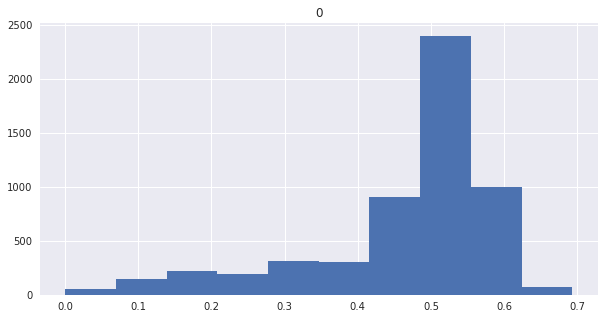

In [60]:
from scipy import stats
from sklearn.preprocessing import normalize, Imputer
z  = np.array(df2['feature_numerical_12'])
im = Imputer(missing_values='NaN', strategy='mean', axis = 0)
z = im.fit_transform(z)
#normalized_z_1 = np.exp(z[0])
normalized_z_1 = np.log(z[0]+1)
#normalized_z_2 = np.exp(normalized_z_1)
#normalized_z, _ = stats.boxcox(normalized_z_1)

#normalized_z, _ = stats.boxcox(normalized_z_2)


k = pd.DataFrame(np.transpose(normalized_z_1))
k.hist()
#print _

In [12]:
pp.ProfileReport(df)

## Data Engineering 

### Feature Definition

In [25]:
num_features = ['feature_numerical_1','feature_numerical_2','feature_numerical_3','feature_numerical_4','feature_numerical_5',
               'feature_numerical_6','feature_numerical_7','feature_numerical_8','feature_numerical_9','feature_numerical_10',
               'feature_numerical_11','feature_numerical_12','feature_numerical_13','feature_numerical_14','feature_categorical_2',
               'feature_categorical_3']

cat_features = ['feature_categorical_2','feature_categorical_3','feature_categorical_4','feature_categorical_5']

cat_to_num_features = ['feature_categorical_2','feature_categorical_3']

cat_only_features = ['feature_categorical_4','feature_categorical_5']

num_only_features = ['feature_numerical_1','feature_numerical_2','feature_numerical_3','feature_numerical_4','feature_numerical_5',
               'feature_numerical_6','feature_numerical_7','feature_numerical_8','feature_numerical_9','feature_numerical_10',
               'feature_numerical_11','feature_numerical_12','feature_numerical_13','feature_numerical_14']

test_features = ['feature_numerical_3','feature_numerical_4','feature_numerical_5']

final_columns = num_features + cat_only_features
labels = ['label']



In [8]:
from scipy.stats.stats import pearsonr   

In [49]:
for i in num_only_features:
    if (sum(df_train[i].isnull())==0):
        print (i, ':', pearsonr(df_train[i],df_train['label'])[0])
    else: 
        print (i, ' :contains null')
#print np.corrcoef(df['feature_numerical_2'],df['label'])

NameError: name 'df_train' is not defined

### Custom Transformers 

In [46]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, Imputer, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
class DFSubsetSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.cols]

class catToNum(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        for i in self.cols:
            self.ind = i[-1:]
            self.new_feature = 'feature_cat_to_num_' + str(self.ind)
            self.X_temp = pd.DataFrame()
            self.X_temp = X.groupby(i).size().reset_index(name = 'counts')
            self.X_temp.rename(columns = {'counts' : self.new_feature}, inplace = True)
            X = X.merge(self.X_temp, how = 'left', on = i)
            X = X.drop(i,axis =1)
        return X
    
class Subset(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        self.col=col
        
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        return X[self.col]
    
class CatToOnehot(BaseEstimator, TransformerMixin):
    
    def __init__(self, col=None):
        self.lenc = LabelEncoder()
        self.ohenc = OneHotEncoder()
        self.col = col
        
    def fit(self, s, y=None):
        self.lenc.fit(s)
        self.derived_feat_name = [self.col+"_"+str(l) for l in list(self.lenc.classes_)]
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        self.ohenc.fit(x_tmp)
        return self

    def transform(self, s):
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        return self.ohenc.transform(x_tmp)
    

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='mean'):
        self.thresh = thresh
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X
    
class cbrtTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y = None):
        return self

    def transform(self, X, y=None):
        for i in X.columns:
            X[i] = np.cbrt(X[i])
        return X

class sqrtTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y = None):
        return self

    def transform(self, X, y=None):
        for i in X.columns:
            X[i] = np.sqrt(X[i])
        return X    
    
class dropHighCorr(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        for i in self.cols:
            X = X.drop(i, axis = 1)
        return X
    
class meanImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, impute=True, impute_strategy='mean'):
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return X

### Model Evaluation 

In [159]:
def plot_pr_curves(actual_Y,pred_prob_Y,thresh):
    fig=plt.figure()
    fpr={}
    rec={}
    thresh={}
    prec={}
    labels =actual_Y
    preds =pred_prob_Y
    prec,rec,thresh = metrics.precision_recall_curve(labels,preds)
    plt.plot(rec,prec)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    title_info="Precision-Recall Curve"
    plt.title(title_info)
    plt.legend(loc='best');
    plt.grid(True)
    plt.show()

### Feature Pipelines 

In [168]:
num_processor = Pipeline([('selector', DFSubsetSelector(num_features)),
                          ('cattonum',catToNum(cat_to_num_features)),
#                          ('meanImputer', Imputer(missing_values='NaN', strategy='mean', axis = 0)),
                          ('meanImputer', meanImputer()),
#                          ('cbrtTrans', cbrtTransform(skewed_var)),
#                          ('sqrtTrans', sqrtTransform(skewed_var)),
                          ('dropHighCorr',dropHighCorr(high_corr))])
num_processor_list = ('num',num_processor)
cat_processor = []
for feat in cat_only_features:
    cat_processor.append((feat,Pipeline(
    [
         ('subset',Subset([feat])),('oneHot',CatToOnehot(feat)),
    ])))

cat_processor.append(num_processor_list)
all_feature_preprocessor = FeatureUnion(transformer_list=(cat_processor))

### Model 

In [132]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn import metrics

In [133]:
param_xgb_1={'max_depth':np.arange(1,10),
      'n_estimators':[100,200,300,500],
      'learning_rate':[0.05,0.01,0.1]}

param_xgb_2 = {'learning_rate':[0.01, 0.05, 0.1, 0.15],
             'max_depth': np.arange(4,8),
             'min_child_weight':np.arange(5,15),
             'silent':[0],
             'subsample':[0.6, 0.7, 0.8],
             'colsample_bytree':[ 0.6, 0.7, 0.8],
             'n_estimators':[200, 300, 500]}

param_xgb_3 = {'learning_rate':[0.05],
             'max_depth': [8],
             'min_child_weight':[12],
             'silent':[0],
             'subsample':[0.8],
             'colsample_bytree':[ 0.6],
             'n_estimators':[300]}



param_rf = { 'n_estimators' : [50, 75, 100, 200, 300, 400, 500],
            'max_depth' : sp_randint(1,8),
            'max_features':sp_randint(4,15),
            'min_samples_split':sp_randint(4,15),
            'min_samples_leaf':sp_randint(4,15),
            'criterion':['gini','entropy']}
    
xgb_clf = xgb.XGBClassifier() 
rf_clf = RandomForestClassifier(n_jobs=-1)
base_clf_rf = RandomizedSearchCV(rf_clf,
                                 param_distributions = param_rf,
                                 n_iter=200,
                                 cv=4)
#base_clf_xgb = GridSearchCV(xgb_clf, param)
base_clf_xgb = GridSearchCV(xgb_clf, param_xgb_3, n_jobs = 4, cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True),
                            scoring = 'roc_auc', refit = True,verbose = 4)

### Train - Test split

In [134]:
from sklearn.model_selection import train_test_split

In [153]:
df_train, df_test, y_train, y_test = train_test_split(df, df[labels], test_size = 0.2, random_state=1, 
                                                                      stratify = df[labels])

In [129]:
df_train.shape, y_train.shape

((4520, 20), (4520, 1))

In [130]:
df_test.shape, y_test.shape

((1131, 20), (1131, 1))

In [370]:
print 'Label Split in Overall Data\n',df['label'].value_counts()/len(df['label'])
print '\n'
print 'Label Split in Test Data\n',df_test['label'].value_counts()/len(df_test['label'])
print '\n'
print 'Label Split in Train Data\n',df_train['label'].value_counts()/len(df_train['label'])

Label Split in Overall Data
0    0.756503
1    0.243497
Name: label, dtype: float64


Label Split in Test Data
0    0.756184
1    0.243816
Name: label, dtype: float64


Label Split in Train Data
0    0.756539
1    0.243461
Name: label, dtype: float64


### Run 

### Predicting Probabilities 

In [169]:
all_feature_preprocessor.fit(df_train)
X_train = all_feature_preprocessor.transform(df_train)
X_test = all_feature_preprocessor.transform(df_test)
#c, r = y_train.shape
#y_train = y_train.values.reshape(c,)

/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akshaysharma/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: 

In [155]:
X_test

<1131x20 sparse matrix of type '<class 'numpy.float64'>'
	with 17126 stored elements in Compressed Sparse Row format>

In [ ]:
#base_clf_rf.best_score_, 
base_clf_xgb.best_score_

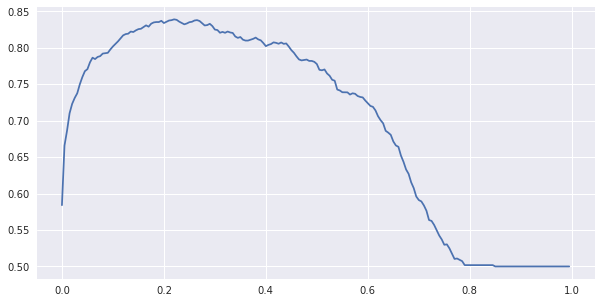

('optimal_threshold=', 0.22, 'for which AUC=', 0.8390887850467289)


In [495]:
base_clf_rf.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_rf = base_clf_rf.predict_proba(X_test)
    y_test_pred=(y_pred_prob_rf[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

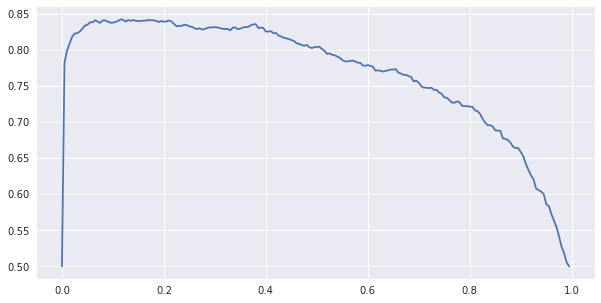

('optimal_threshold=', 0.115, 'for which AUC=', 0.84194350042480892)


In [497]:
base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [ ]:
base_clf_rf.best_score_, base_clf_xgb.best_score_

In [498]:
cutoff_rf = 0.22
cutoff_xgb = 0.180
y_test_rf=(y_pred_prob_rf[:,1]>cutoff_rf).astype('int')
y_test_xgb=(y_pred_prob_xgb[:,1]>cutoff_xgb).astype('int')
metrics.average_precision_score(y_test, y_test_rf), metrics.average_precision_score(y_test, y_test_xgb)

(0.74472590627763047, 0.74886637204834539)

### Imputing by Median 

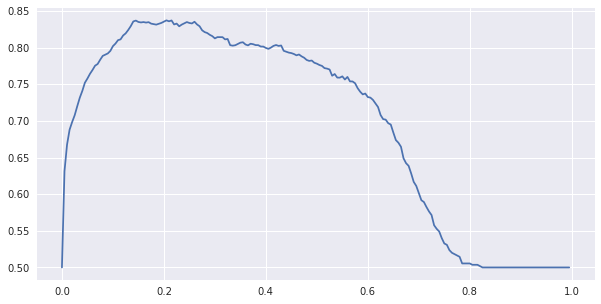

('optimal_threshold=', 0.20500000000000002, 'for which AUC=', 0.83740229396771448)


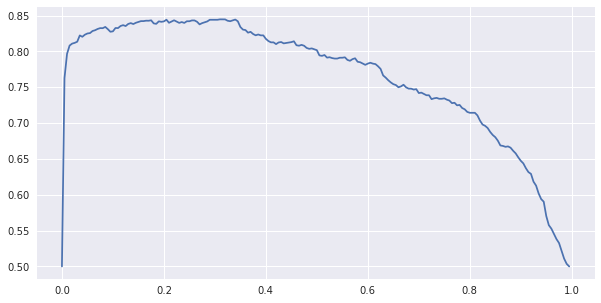

('optimal_threshold=', 0.31, 'for which AUC=', 0.84471537807986419)


In [568]:
base_clf_rf.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_rf = base_clf_rf.predict_proba(X_test)
    y_test_pred=(y_pred_prob_rf[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

#### GridSearch (Mean) 

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4, score=0.890979, total=   2.4s
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4, score=0.900664, total=   2.5s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=200, subsample=0.7, max_depth=4 
[CV] colsam

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   15.2s


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=4, score=0.892546, total=   3.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=4, score=0.909628, total=   5.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=4, score=0.897748, total=   4.7s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=4, score=0.898405, total=   5.0s
[CV] colsample_

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.4min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=4, score=0.903774, total=   3.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=4, score=0.893960, total=   3.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=4, score=0.893087, total=   3.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.8, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=8, n_estimators=300, subsample=0.7, max_depth=4, score=0.903903, total=   3.2s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  3.4min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.8, max_depth=4, score=0.906891, total=   5.1s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=13, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.8, max_depth=4, score=0.896661, total=   4.7s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=13, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=13, n_estimators=200, subsample=0.6, max_depth=4, score=0.899118, total=   2.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=13, n_estimators=200, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=13, n_estimators=200, subsample=0.6, max_depth=4, score=0.891118, total=   2.2s
[CV] col

[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  6.3min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=5, score=0.904228, total=   2.6s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=5, score=0.894605, total=   2.8s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=5, score=0.894738, total=   3.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=300, subsample=0.7, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=5, score=0.906728, total=   3.3s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed: 10.4min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.6, max_depth=6, score=0.899974, total=   4.2s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.8, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=6, score=0.910971, total=   4.2s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.8, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=6, score=0.900280, total=   3.9s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.8, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=6, score=0.899939, total=   4.4s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 16.0min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.6, max_depth=7, score=0.901174, total=   4.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.6, max_depth=7, score=0.901438, total=   4.6s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=7, score=0.911920, total=   5.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.01, min_child_weight=7, n_estimators=300, subsample=0.7, max_depth=7, score=0.901993, total=   4.6s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 1193 tasks      | elapsed: 22.2min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.7, max_depth=4, score=0.901611, total=   2.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=4, score=0.910718, total=   2.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=4, score=0.902544, total=   2.1s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=300, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.8, max_depth=4, score=0.902742, total=   2.4s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed: 28.2min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.7, max_depth=5, score=0.915799, total=   5.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.7, max_depth=5, score=0.904434, total=   5.3s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.7, max_depth=5, score=0.903831, total=   5.2s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=13, n_estimators=200, subsample=0.6, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=500, subsample=0.8, max_depth=5, score=0.916165, total=   5.6s
[CV] col

[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 36.3min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7, score=0.904587, total=   3.2s
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7, score=0.915730, total=   3.2s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=7 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7, score=0.905498, total=   3.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=300, subsample=0.7, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=300, subsample=0.6, max_depth=7, score=0.914578, total=   4.3s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 44.2min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5, score=0.916358, total=   4.1s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5, score=0.900784, total=   3.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5, score=0.899309, total=   3.9s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=500, subsample=0.6, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=5, score=0.917047, total=   3.6s
[CV] colsample_bytree=

[Parallel(n_jobs=4)]: Done 2957 tasks      | elapsed: 53.4min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=300, subsample=0.7, max_depth=6, score=0.896546, total=   4.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=500, subsample=0.6, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=300, subsample=0.8, max_depth=6, score=0.914640, total=   4.1s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=500, subsample=0.6, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=300, subsample=0.8, max_depth=6, score=0.903669, total=   3.8s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=500, subsample=0.6, max_depth=6 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=300, subsample=0.8, max_depth=6, score=0.900025, total=   3.6s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 3520 tasks      | elapsed: 63.3min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=5, score=0.900280, total=   3.4s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=5, score=0.894274, total=   3.5s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5, score=0.916985, total=   3.9s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=5, n_estimators=300, subsample=0.7, max_depth=5, score=0.899861, total=   3.8s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 4133 tasks      | elapsed: 74.3min


[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.7, max_depth=7, score=0.911941, total=   2.9s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.6, max_depth=7, score=0.896575, total=   3.2s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.7, max_depth=7, score=0.900327, total=   3.0s
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=200, subsample=0.7, max_depth=7, score=0.899326, total=   3.1s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 4794 tasks      | elapsed: 85.8min


[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=5, score=0.895569, total=   3.6s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.6, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=5, score=0.896360, total=   3.5s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.7, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.6, max_depth=5, score=0.908519, total=   5.2s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.7, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=500, subsample=0.6, max_depth=5, score=0.899202, total=   5.3s
[CV] col

[Parallel(n_jobs=4)]: Done 5505 tasks      | elapsed: 100.2min


[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=4, score=0.916545, total=   4.9s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=4, score=0.903977, total=   4.9s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.6, max_depth=4, score=0.910918, total=   2.2s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=9, n_estimators=200, subsample=0.6, max_depth=4, score=0.901300, total=   2.0s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 6264 tasks      | elapsed: 114.1min


[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.6, max_depth=7, score=0.904637, total=   3.2s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=7 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=6, n_estimators=500, subsample=0.8, max_depth=7, score=0.901312, total=   7.6s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=7, score=0.903004, total=   3.2s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=7, score=0.915605, total=   3.4s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 7073 tasks      | elapsed: 128.5min


[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.6, max_depth=6, score=0.915773, total=   2.9s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=6 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.6, max_depth=6, score=0.898681, total=   2.6s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=6 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.6, max_depth=6, score=0.899247, total=   2.5s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=7, n_estimators=200, subsample=0.7, max_depth=6 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.1, min_child_weight=6, n_estimators=500, subsample=0.8, max_depth=6, score=0.896829, total=   6.4s
[CV] colsample_bytree=

[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 143.8min


[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.6, max_depth=5, score=0.894046, total=   5.0s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=5, score=0.910942, total=   5.4s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.6, max_depth=5, score=0.889637, total=   5.5s
[CV] colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.8, max_depth=5 
[CV]  colsample_bytree=0.7, silent=0, learning_rate=0.15, min_child_weight=8, n_estimators=500, subsample=0.7, max_depth=5, score=0.896589, total=   5.0s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 8837 tasks      | elapsed: 160.2min


[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.6, max_depth=4, score=0.901465, total=   3.1s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.6, max_depth=4, score=0.892339, total=   3.4s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.7, max_depth=4, score=0.901293, total=   3.1s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.01, min_child_weight=12, n_estimators=300, subsample=0.6, max_depth=4, score=0.892625, total=   3.6s
[CV] col

[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 179.5min


[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.6, max_depth=4, score=0.915352, total=   4.8s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.6, max_depth=4, score=0.902244, total=   4.9s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.6, max_depth=4, score=0.900230, total=   5.2s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.8, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=7, n_estimators=500, subsample=0.7, max_depth=4, score=0.916523, total=   5.0s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 198.7min


[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=14, n_estimators=500, subsample=0.8, max_depth=7, score=0.914561, total=   6.6s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4, score=0.914045, total=   2.3s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=200, subsample=0.6, max_depth=4, score=0.903241, total=   2.1s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=5, n_estimators=200, subsample=0.7, max_depth=4 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.05, min_child_weight=14, n_estimators=500, subsample=0.8, max_depth=7, score=0.901463, total=   6.9s
[CV] colsample_byt

[Parallel(n_jobs=4)]: Done 11850 tasks      | elapsed: 218.1min


[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=13, n_estimators=500, subsample=0.8, max_depth=7, score=0.902385, total=   6.1s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=200, subsample=0.6, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=200, subsample=0.6, max_depth=7, score=0.912113, total=   2.9s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=200, subsample=0.7, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=200, subsample=0.6, max_depth=7, score=0.897390, total=   2.9s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=14, n_estimators=200, subsample=0.7, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.1, min_child_weight=13, n_estimators=500, subsample=0.8, max_depth=7, score=0.895833, total=   6.9s
[CV] colsample_

[Parallel(n_jobs=4)]: Done 12953 tasks      | elapsed: 238.0min


[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.6, max_depth=7, score=0.888322, total=   5.6s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.7, max_depth=7, score=0.911098, total=   6.2s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.7, max_depth=7, score=0.897653, total=   5.5s
[CV] colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.8, max_depth=7 
[CV]  colsample_bytree=0.8, silent=0, learning_rate=0.15, min_child_weight=14, n_estimators=500, subsample=0.7, max_depth=7, score=0.891463, total=   6.1s
[CV]  co

[Parallel(n_jobs=4)]: Done 12960 out of 12960 | elapsed: 238.2min finished


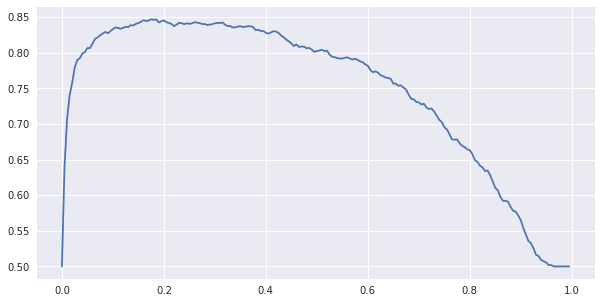

('optimal_threshold=', 0.17500000000000002, 'for which AUC=', 0.84701146983857267)


In [ ]:
base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

### Second Run 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8 
[CV] colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8 
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8, score=0.905058, total=   3.3s
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8, score=0.906018, total=   3.4s
[CV]  colsample_bytree=0.6, silent=0, learning_rate=0.05, min_child_weight=12, n_estimators=300, subsample=0.8, max_depth=8, score=0.909802, total=   3.5s


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.8s finished


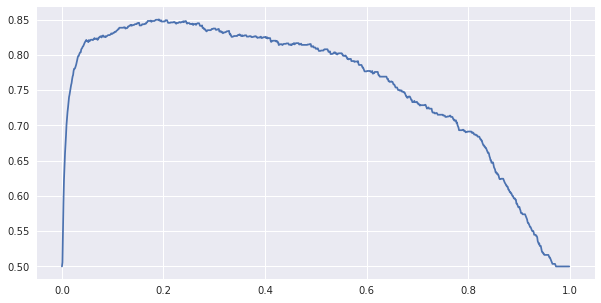

('optimal_threshold=', 0.191, 'for which AUC=', 0.8502527612574341)


In [44]:
base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.001):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

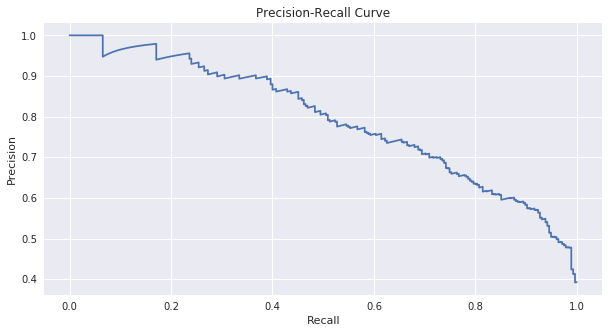

In [86]:
y_pred_prob_xgb_1 = y_pred_prob_xgb[:,1]
plot_pr_curves(y_test,y_pred_prob_xgb_1, cutoff_xgb)

In [45]:
base_clf_xgb.best_score_

0.90695992821966642

### Third Run with transformed features 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8 
[CV] colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8 
[CV] colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8, score=0.9013098140446484, total=   2.2s
[CV]  colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8, score=0.9054448109374253, total=   2.3s
[CV]  colsample_bytree=0.6, learning_rate=0.05, max_depth=8, min_child_weight=12, n_estimators=300, silent=0, subsample=0.8, score=0.9156007109826728, total=   2.4s


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished


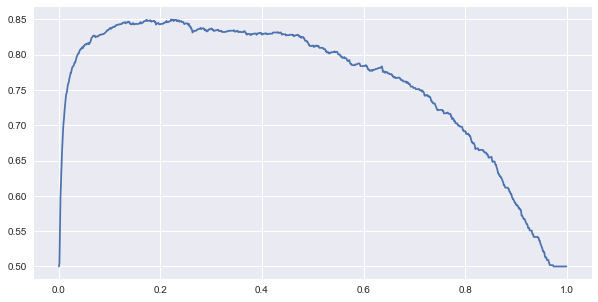

optimal_threshold= 0.221 for which AUC= 0.850055225148683


In [170]:
base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.001):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

No handles with labels found to put in legend.


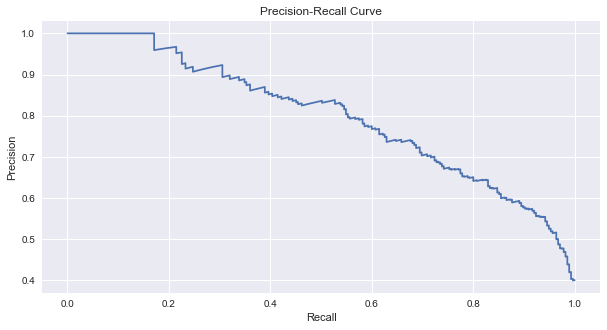

In [160]:
y_pred_prob_xgb_1 = y_pred_prob_xgb[:,1]
plot_pr_curves(y_test,y_pred_prob_xgb_1, cutoff_xgb)

In [171]:
cutoff_xgb = 0.221
y_test_xgb=(y_pred_prob_xgb[:,1]>cutoff_xgb).astype('int')
metrics.average_precision_score(y_test, y_test_xgb)

0.5503068692078806

In [157]:
cutoff_xgb = 0.1
y_test_xgb=(y_pred_prob_xgb[:,1]>cutoff_xgb).astype('int')
metrics.average_precision_score(y_test, y_test_xgb)
plt.figure()
metrics.precision_recall_curve
plt.show()

In [47]:
best_parameters, score, _ = max(base_clf_xgb.grid_scores_, key=lambda x: x[1])
print 'Raw AUC score:', score
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score: 0.90695992822
colsample_bytree: 0.6
learning_rate: 0.05
max_depth: 8
min_child_weight: 12
n_estimators: 300
silent: 0
subsample: 0.8


/home/vagrant/miniconda2/envs/modelhost/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [131]:
from sklearn import model_selection
from sklearn import ensemble
import time
from sklearn.metrics import accuracy_score as accuracy

In [586]:
randomSeed = 1
numFolds   = 4

stratifiedCV = model_selection.StratifiedKFold(n_splits=numFolds, shuffle=True, random_state=randomSeed)

mainLearner = ensemble.ExtraTreesClassifier(n_estimators=500, max_depth=7, 
                                            min_samples_leaf=240, max_features=12, 
                                            criterion='entropy', bootstrap=False, 
                                            n_jobs=-1, random_state=randomSeed)
labelsDb = df['label']
mainDb = df[final_columns]
startTime = time.time()
trainAccuracy = []; validAccuracy = [];
trainLogLosses = []; validLogLosses = []
for trainInds, validInds in stratifiedCV.split(mainDb, labelDb):
    # split to train and valid sets
    X_train_CV = mainDb.iloc[trainInds,:]
    y_train_CV = labelDb.iloc[trainInds]
    X_valid_CV = mainDb.iloc[validInds,:]
    y_valid_CV = labelDb.iloc[validInds]
    all_feature_preprocessor.fit(X_train_CV)
    x_train_CV = all_feature_preprocessor.transform(X_train_CV)
    x_valid_CV = all_feature_preprocessor.transform(X_valid_CV)
    ## train learner
    mainLearner.fit(x_train_CV, y_train_CV)
    
    ## make predictions
    y_train_hat_mainLearner = mainLearner.predict_proba(x_train_CV)[:,1]
    y_valid_hat_mainLearner = mainLearner.predict_proba(x_valid_CV)[:,1]

    # store results
    trainAccuracy.append(accuracy(y_train_CV, y_train_hat_mainLearner > 0.5))
    validAccuracy.append(accuracy(y_valid_CV, y_valid_hat_mainLearner > 0.5))
    trainLogLosses.append(log_loss(y_train_CV, y_train_hat_mainLearner))
    validLogLosses.append(log_loss(y_valid_CV, y_valid_hat_mainLearner))

print("-----------------------------------------------------")
print("total (train,valid) Accuracy = (%.5f,%.5f). took %.2f minutes" % (np.mean(trainAccuracy),np.mean(validAccuracy), (time.time()-startTime)/60))
print("total (train,valid) Log Loss = (%.5f,%.5f). took %.2f minutes" % (np.mean(trainLogLosses),np.mean(validLogLosses), (time.time()-startTime)/60))
print("-----------------------------------------------------")

-----------------------------------------------------
total (train,valid) Accuracy = (0.79726,0.79402). took 0.41 minutes
total (train,valid) Log Loss = (0.37745,0.37963). took 0.41 minutes
-----------------------------------------------------


In [578]:
base_clf_rf.fit(x_train_CV, y_train_CV)
base_clf_xgb.fit(x_train_CV, y_train_CV)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 500], 'learning_rate': [0.05, 0.01, 0.1], 'max_depth': [4, 5, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

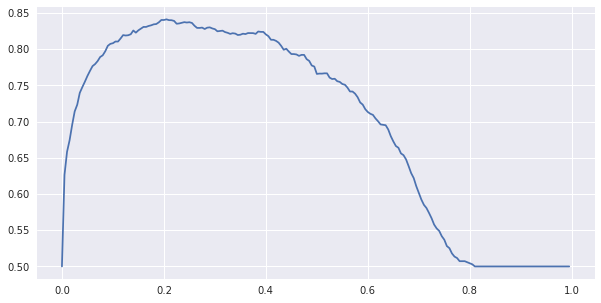

('optimal_threshold=', 0.20500000000000002, 'for which AUC=', 0.84105260865778242)


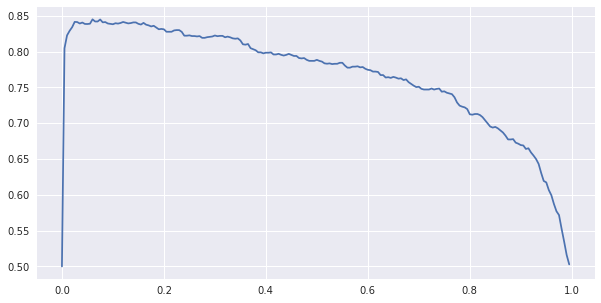

('optimal_threshold=', 0.059999999999999998, 'for which AUC=', 0.84502112185349709)


In [522]:
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_rf = base_clf_rf.predict_proba(x_valid_CV)
    y_test_pred=(y_pred_prob_rf[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_valid_CV,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))


auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(x_valid_CV)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_valid_CV,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

### Stratified CV With Median Imputer 

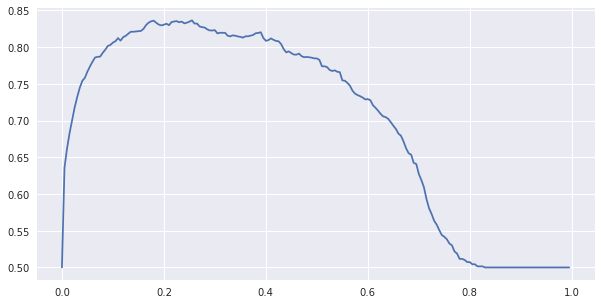

('optimal_threshold=', 0.255, 'for which AUC=', 0.83647439247452327)


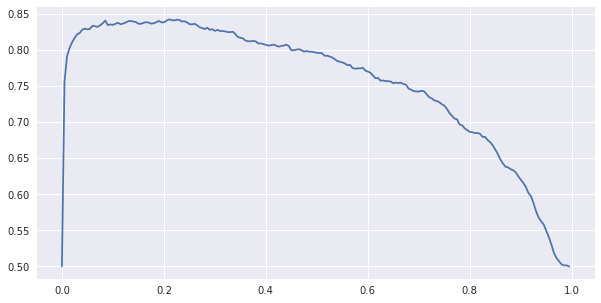

('optimal_threshold=', 0.20999999999999999, 'for which AUC=', 0.84263674767006358)


In [579]:
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_rf = base_clf_rf.predict_proba(x_valid_CV)
    y_test_pred=(y_pred_prob_rf[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_valid_CV,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))


auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = base_clf_xgb.predict_proba(x_valid_CV)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_valid_CV,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

In [482]:
X_train_CV.shape, X_valid_CV.shape

((4239, 20), (1412, 20))

## Feature Importance 

In [469]:
rf=base_clf_rf.best_estimator_
feat_importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(feat_importances)[::-1]
    # collect the features

    # Print the feature ranking
#print("\n\nFeature ranking for RF model with "+ i + ":\n")
num_feat=len(num_features)

for f in np.arange(0,num_feat):
    print("%d. %s (%f)" % (f + 1,final_columns[indices[f]], feat_importances[indices[f]]))

1. feature_numerical_10 (0.366779)
2. feature_numerical_11 (0.183009)
3. feature_categorical_2 (0.093611)
4. feature_numerical_4 (0.084085)
5. feature_numerical_14 (0.055754)
6. feature_numerical_8 (0.048392)
7. feature_categorical_3 (0.047061)
8. feature_numerical_6 (0.021995)
9. feature_numerical_12 (0.020591)
10. feature_numerical_9 (0.012871)
11. feature_categorical_2 (0.012375)
12. feature_categorical_3 (0.012165)
13. feature_categorical_4 (0.011421)
14. feature_numerical_13 (0.010039)
15. feature_numerical_7 (0.007434)
16. feature_categorical_5 (0.004757)


In [528]:
base_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Reduced Features 

In [543]:
r_num_features = ['feature_numerical_10','feature_numerical_11','feature_categorical_2']
r_cat_to_num_features = ['feature_categorical_2']
r_cat_features = ['feature_categorical_4','feature_categorical_5']
r_final_features = r_num_features + r_cat_features

In [551]:
r_num_processor = Pipeline([('selector', DFSubsetSelector(r_num_features)),
                          ('cattonum',catToNum(r_cat_to_num_features)),
                          ('meanImputer', Imputer(missing_values='NaN', strategy='mean', axis = 0))
                                 ])
r_num_processor_list = ('num',r_num_processor)
r_cat_processor = []
for feat in r_cat_features:
    r_cat_processor.append((feat,Pipeline(
    [
         ('subset',Subset([feat])),('oneHot',CatToOnehot(feat)),
    ])))

r_cat_processor.append(r_num_processor_list)
r_all_feature_preprocessor = FeatureUnion(transformer_list=(r_cat_processor))

In [552]:
print r_all_feature_preprocessor

FeatureUnion(n_jobs=1,
       transformer_list=[('feature_categorical_4', Pipeline(steps=[('subset', Subset(col=['feature_categorical_4'])), ('oneHot', CatToOnehot(col='feature_categorical_4'))])), ('feature_categorical_5', Pipeline(steps=[('subset', Subset(col=['feature_categorical_5'])), ('oneHot', CatToOnehot(col='feature_cat...), ('meanImputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0))]))],
       transformer_weights=None)


#### For test-train split 

In [553]:
r_all_feature_preprocessor.fit(df_train)
X_train = r_all_feature_preprocessor.transform(df_train)
X_test = r_all_feature_preprocessor.transform(df_test)
#c, r = y_train.shape
#y_train = y_train.values.reshape(c,)

In [554]:
X_train.shape

(4520, 8)

In [555]:
r_param_xgb={'max_depth':np.arange(1,10),
      'n_estimators':[100,200,300,500],
      'learning_rate':[0.05,0.01,0.1]}

r_param_rf = { 'n_estimators' : [50, 75, 100, 200, 300, 400, 500],
            'max_depth' : sp_randint(1,8),
            'max_features':sp_randint(2,6),
            'min_samples_split':sp_randint(4,15),
            'min_samples_leaf':sp_randint(4,15),
            'criterion':['gini','entropy']}
    
r_xgb_clf = xgb.XGBClassifier() 
r_rf_clf = RandomForestClassifier(n_jobs=-1)
r_base_clf_rf = RandomizedSearchCV(r_rf_clf,
                                 param_distributions = r_param_rf,
                                 n_iter=200,
                                 cv=4)
r_base_clf_xgb = GridSearchCV(r_xgb_clf, param)

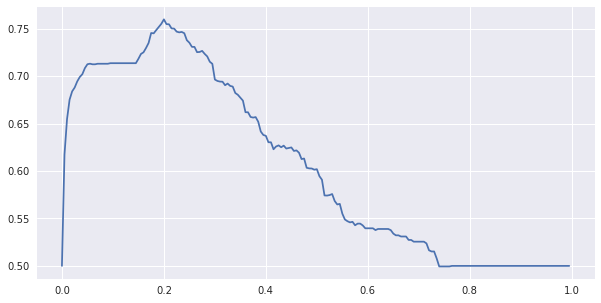

('optimal_threshold=', 0.20000000000000001, 'for which AUC=', 0.75978122344944776)


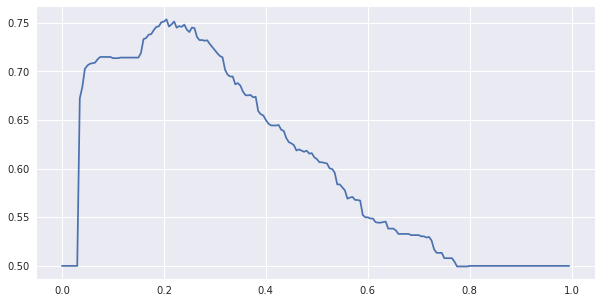

('optimal_threshold=', 0.20500000000000002, 'for which AUC=', 0.75348768054375537)


In [557]:
r_base_clf_rf.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_rf = r_base_clf_rf.predict_proba(X_test)
    y_test_pred=(y_pred_prob_rf[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))

r_base_clf_xgb.fit(X_train, y_train)
auc=[]
thres=[]
for cutoff in np.arange(0,1,0.005):
    y_pred_prob_xgb = r_base_clf_xgb.predict_proba(X_test)
    y_test_pred=(y_pred_prob_xgb[:,1]>cutoff).astype('int')
    a=metrics.roc_auc_score(y_test,y_test_pred)
    auc.append(a)
    thres.append(cutoff)
plt.plot(thres,auc)
plt.show()
print('optimal_threshold=',thres[auc.index(max(auc))], 'for which AUC=',max(auc))